In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from model_utils import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
model = "random_forest"

In [3]:
params = PARAMETERS[model]
regressor = MODELS[model]
normalize = NORMALIZE[model]

In [4]:
data_df = get_data(drop_columns=REMOVE, normalize=normalize)
x, y = data_df.drop(columns=["paredao", "nome", "rejeicao"], axis=1).to_numpy(), data_df.drop(columns=data_df.columns[:-1], axis=1).to_numpy()
y = np.ravel(y)

In [5]:
reg = regressor(**params)

In [6]:
preds = cross_val_predict(reg, x, y, cv=10, n_jobs=5)

In [7]:
data_df["predicao"] = preds

In [8]:
data_df["erro_absoluto"] = abs(data_df["rejeicao"] - data_df["predicao"])

In [9]:
data_df[["paredao", "nome", "rejeicao", "predicao", "erro_absoluto"]].sort_values(by="erro_absoluto")

,paredao,nome,rejeicao,predicao,erro_absoluto
9,7,babu,0.0460,0.044966,0.001034
48,4,victor_hugo,0.3608,0.348881,0.011919
12,3,felipe_prior,0.2029,0.188490,0.014410
14,10,manu_gavassi,0.4251,0.442442,0.017342
2,17,thelma,0.3141,0.333494,0.019394
4,6,guilherme,0.5607,0.589298,0.028598
18,9,flayslene,0.0954,0.126787,0.031387
10,7,manu_gavassi,0.1018,0.056889,0.044911
20,8,babu,0.4771,0.522025,0.044925
22,8,pyong,0.5170,0.469137,0.047863


# Plot de real x predito

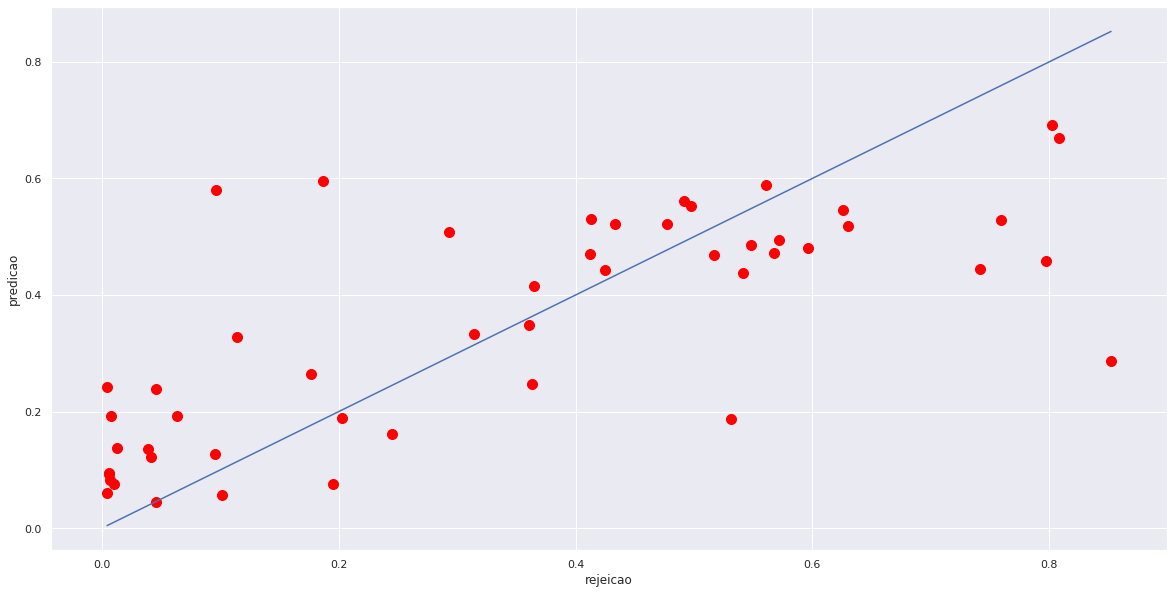

In [10]:
data_df.plot.scatter(x="rejeicao", y="predicao", c="red", s=100)
x_min, x_max = data_df["rejeicao"].min(), data_df["rejeicao"].max()
y_min, y_max = data_df["predicao"].min(), data_df["predicao"].max()
range = [min(x_min, y_min), max(x_max, y_max)]
plt.plot(range, range)

In [11]:
y_real = data_df["rejeicao"].values
pred = data_df["predicao"].values
for metric in METRICS.keys():
    print("{}: {}".format(metric, METRICS[metric](y_real, pred)))

mse: 0.031446562518315076
mae: 0.13044249032539681
r2: 0.5530076898996772


# Correlação de real x predito

In [12]:
cor = data_df[["rejeicao", "predicao"]].corr()

In [13]:
cor["rejeicao"]

rejeicao    1.00000
predicao    0.74439
Name: rejeicao, dtype: float64